# Fit M16 dust emission with mantipython

December 9, 2023

Following fit_FIR.py, which seems to be from early 2020. Its handling of my filesystem and organization is sort of outdated and I think I can do a comparable job here.

I am considering going start-to-finish with the reprocessing and PACS calibration. The notebook format will make this modular(ish).

The color solution is already implemented in go_dust.fir_intensity_2. So I won't bother with that here.

First, I'll see about correcting the 70 micron background to match te 160 micron 0-contour.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from glob import glob
import os

In [7]:
dirname = "/home/ramsey/Documents/Research/Feedback/m16_data/herschel/processed/1342218995_reproc160"
fn_stub_f = lambda b : "*PACS" + str(b) + "um-image*"
fns = {b: glob(os.path.join(dirname, fn_stub_f(b))).pop() for b in [70, 160]}

In [48]:
imgs = {b: fits.getdata(fns[b], header=True) for b in fns}
for b in list(imgs.keys()):
    img, hdr = imgs[b]
    img = img[1400:2500, 2500:]
    imgs[b] = (img, hdr)

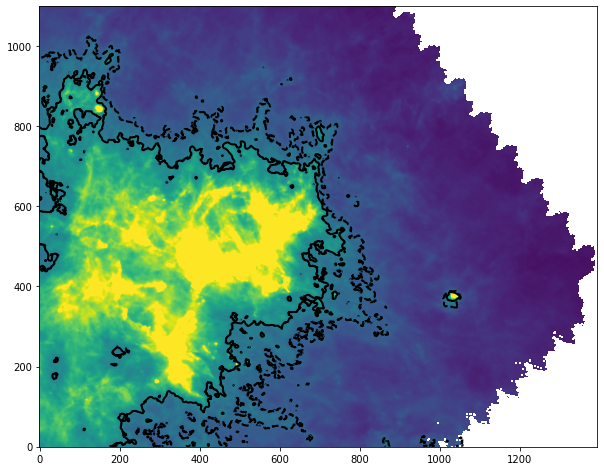

In [59]:
img_160 = imgs[160][0]
plt.figure(figsize=(10, 10))
plt.imshow(img_160, origin='lower', vmax=2000)
cutoff = 200
plt.contour(img_160, levels=[-cutoff, cutoff], linewidths=2, colors='k')

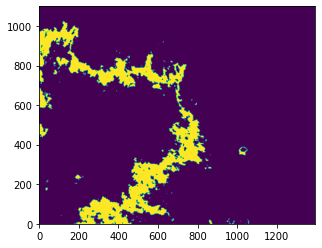

In [60]:
mask = (img_160 > -cutoff) & (img_160 < cutoff)
plt.imshow(mask.astype(int), origin='lower')

10.116212338593975 %
6  pixels nan
10.11582105125864 % not nan
Mean 302.63
Median 286.30
Std 158.85


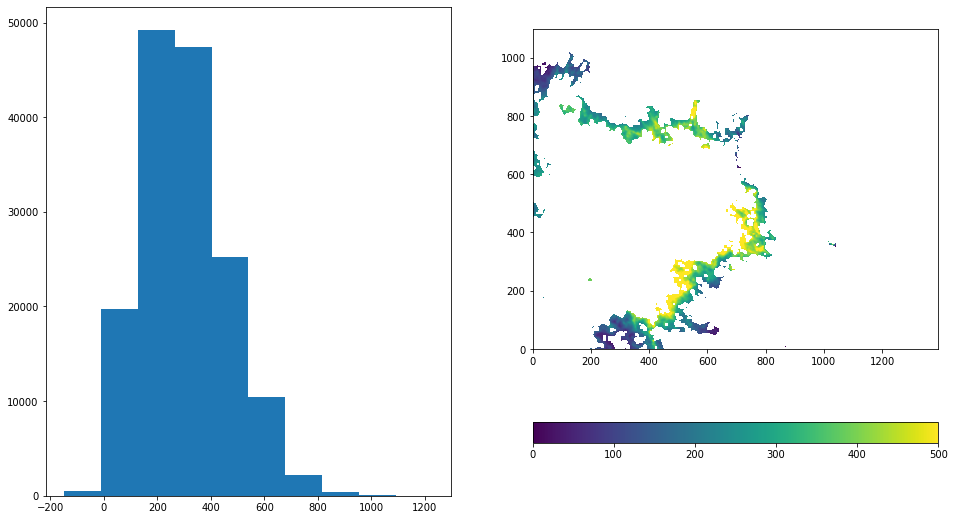

In [61]:
vals_70_at_0_160 = imgs[70][0][mask]
print(100*float(vals_70_at_0_160.size)/img_160.size, "%")
print(np.isnan(vals_70_at_0_160).sum(), " pixels nan")
vals_70_at_0_160 = vals_70_at_0_160[np.isfinite(vals_70_at_0_160)]
print(100*float(vals_70_at_0_160.size)/img_160.size, "% not nan")

plt.figure(figsize=(16, 9))
plt.subplot(121)
plt.hist(vals_70_at_0_160)
plt.subplot(122)
img_70_copy = imgs[70][0].copy()
img_70_copy[~mask] = np.nan
plt.imshow(img_70_copy, origin='lower', vmin=0, vmax=500)
plt.colorbar(orientation='horizontal')

print(f"Mean {np.mean(vals_70_at_0_160):.2f}")
print(f"Median {np.median(vals_70_at_0_160):.2f}")
print(f"Std {np.std(vals_70_at_0_160):.2f}")